# Simple MNIST convnet
by uramoon@kw.ac.kr

원본 출처<br>
**Author:** [fchollet](https://twitter.com/fchollet) (<a href="https://raw.githubusercontent.com/ronreiter/interactive-tutorials/master/LICENSE">Apache 2.0 License</a>)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

상단 메뉴 런타임 - 런타임 유형 변경에서 **GPU**를 선택하고 진행하세요.

## Setup

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## TODO 1: Feature scaling

In [ ]:
# Model / data parameters
num_classes = 10            # 레이블의 개수 (0, 1, 2, ..., 9, 10개) 
input_shape = (28, 28, 1)   # CNN은 2차원 정보를 활용합니다. (28 x 28 흑백 이미지 한 장, 기존 MLP는 784개 픽셀의 명암을 사용)

# the data, split between train and test sets
# X를 이미지, y를 이미지에 대한 레이블로 표현합니다.
# X_train[0]은 첫 번째 훈련 그림, y_train[0]은 첫 번째 훈련 그림의 정답 ([0, 9]에 속한 숫자 하나)
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# 각 픽셀 값을 [0, 255] -> [0, 1]로 변환하세요.
X_train = X_train.astype("float32") / 256
X_test = X_test.astype("float32") / 256

11490434/11490434 [==============================] - 2s 0us/step


## TODO 2: Input shape

In [ ]:
# 훈련용 이미지의 shape을 출력하세요. (6만장의 28 x 28 이미지)
print(X_train.shape)

(60000, 28, 28)


## TODO 3: Shape expanding

In [ ]:
# Make sure images have shape (28, 28, 1) 
# CNN은 한 장의 이미지 모양을 (가로, 세로, 채널 수)로 만들어야 합니다.
# 컬러 이미지는 R, G, B 세 장의 채널이지만 MNIST는 흑백이라 한 장의 채널이 필요합니다.
# 최종적으로 6만장의 28 x 28 이미지 흑백 채널 하나가 필요합니다.
# 가장 마지막 자리에 차원 하나 늘리기: (60000, 28, 28) -> (60000, 28, 28, 1), 
# 차원 늘리기 대신 reshape 함수도 사용 가능

# expand_dims는 NumPy 배열의 특정 위치에 차원을 늘려줍니다.
# 파이썬에서 인덱싱할 때 가장 마지막 위치를 나타내는 (음의) 정수를 기입하세요.
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # 3 by 3 크기로 이차원 이미지를 Scan 하는 유닛이 32개 있음
        layers.MaxPooling2D(pool_size=(2, 2)),                    # 2 by 2 크기의 이미지를 하나의 값으로 요약
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), # 3 by 3 크기로 이차원 이미지를 Scan 하는 유닛이 64개 있음
        layers.MaxPooling2D(pool_size=(2, 2)),                    # 2 by 2 크기의 이미지를 하나의 값으로 요약
        layers.Flatten(),                                 # MLP에 사용되는 입력처럼 1차원 배열로 만들어주는 층
        layers.Dense(num_classes, activation="softmax"),  # CNN의 출력층은 MLP와 동일합니다.
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

##TODO 4: Model training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

batch_size = 128
epochs = 10000

model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

# TODO: 자유롭게 설정하세요.
# https://keras.io/api/callbacks/early_stopping/
es = EarlyStopping(patience=15, restore_best_weights=False)

# 훈련 데이터의 20%는 사용하지 않고 남겨두었다가 Epoch이 끝날 때마다 남겨둔 데이터로 성능을 평가하여 출력해보세요.
# 따로 테스트를 하지 않더라도 테스트 했을 때의 성능을 짐작할 수 있게 도와줍니다.
# Hint: https://keras.io/api/models/model_training_apis/ 에서 fit method 참조
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=es, validation_split=0.2)

Epoch 1/10000
375/375 [==============================] - 13s 5ms/step - loss: 0.3149 - accuracy: 0.9130 - val_loss: 0.0982 - val_accuracy: 0.9705
Epoch 2/10000
375/375 [==============================] - 2s 5ms/step - loss: 0.0818 - accuracy: 0.9750 - val_loss: 0.0691 - val_accuracy: 0.9793
Epoch 3/10000
375/375 [==============================] - 2s 4ms/step - loss: 0.0591 - accuracy: 0.9824 - val_loss: 0.0569 - val_accuracy: 0.9829
Epoch 4/10000
375/375 [==============================] - 2s 4ms/step - loss: 0.0469 - accuracy: 0.9854 - val_loss: 0.0557 - val_accuracy: 0.9838
Epoch 5/10000
375/375 [==============================] - 2s 6ms/step - loss: 0.0423 - accuracy: 0.9873 - val_loss: 0.0594 - val_accuracy: 0.9821
Epoch 6/10000
375/375 [==============================] - 2s 5ms/step - loss: 0.0356 - accuracy: 0.9886 - val_loss: 0.0508 - val_accuracy: 0.9843
Epoch 7/10000
375/375 [==============================] - 2s 4ms/step - loss: 0.0298 - accuracy: 0.9909 - val_loss: 0.0471 - val_a

## Evaluate the trained model

Test 정확도가 99% 미만이면 TODO4부터 다시 수행하세요.

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04849518463015556
Test accuracy: 0.9901999831199646


## 우리가 만든 테스트 데이터 읽어오기
좌측 파일 메뉴를 활용하여 test_images.npy, test_labels.npy 파일을 Colab에 업로드하세요.


In [ ]:
our_test_images = np.load('our_test_images.npy')
our_test_labels = np.load('our_test_labels.npy')

잘 읽어왔는지 9장을 무작위로 그려봅니다.

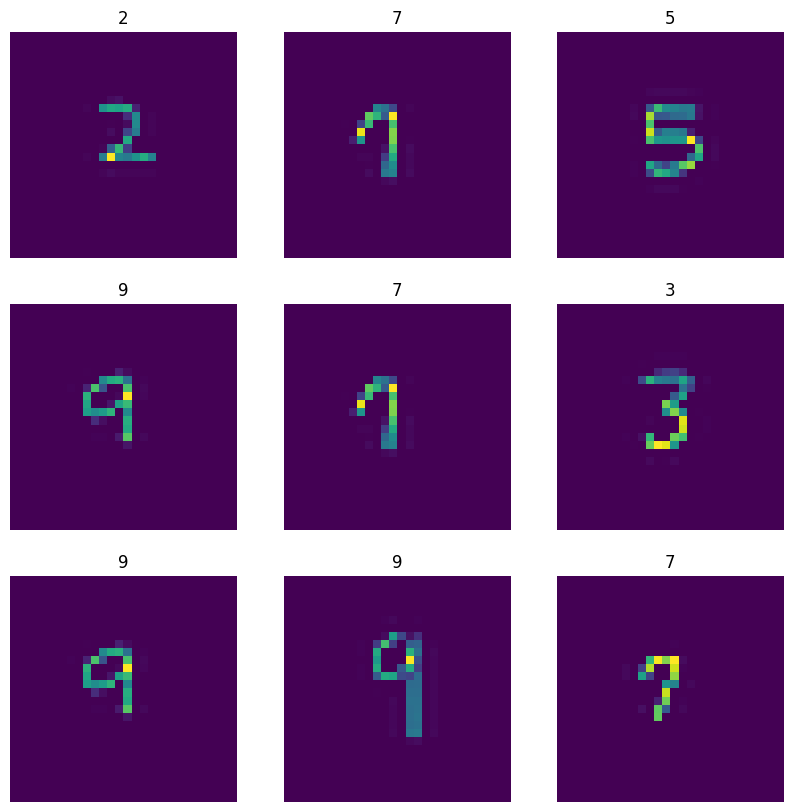

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  rand = random.randint(0, len(our_test_images) - 1)
  plt.imshow(our_test_images[rand].reshape(28, 28))
  plt.title(our_test_labels[rand])
  plt.axis("off")

## TODO5: 테스트 이미지 모양 변환

In [ ]:
# TODO: 현재 our_test_images의 모양을 출력해봅시다.
print(our_test_images.shape)

(30, 784)


In [ ]:
# TODO: 우리가 만든 모델의 입력층에 들어갈 수 있도록 our_test_images 모양을 바꿔봅시다.
# Hint: reshape 함수를 사용하시면 쉽습니다.
our_test_images = our_test_images.reshape(-1, 28, 28, 1)

## TODO 6: 우리가 만든 테스트 데이터로 모델 평가
evaluate 함수를 사용합니다. 예측이 잘 되나요?<br>
다음 시간에 이 문제를 해결할 것입니다.

In [ ]:
model.evaluate(our_test_images, our_test_labels)

1/1 [==============================] - 0s 33ms/step - loss: 3.1965 - accuracy: 0.4000


[3.1965339183807373, 0.4000000059604645]